<a href="https://colab.research.google.com/github/rpasquini/herramientas-econometricas/blob/main/Geometric_Brownian_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ricardo Pasquini 
rpasquini@gmail.com

# Simulating a Geometric Brownian Motion

The Geometric Brownian Motion is a continuous stochastic process.

Consider a (continuous time) process $S_t$ that satisfies the following stochastic differential equation:

$$dS=\mu S_t dt+\sigma S_t dW_t $$
Where $dW_t$ is a change defined over a *Brownian Motion process* (also Wiener process). Notice that the process adds the constant $\mu$ (''a percentage drift").

The stochastic differential equation has an analytic solution, which gives an expression for the Geometric Brownian Motion:
$$ S_t=S_0e^{(\mu-\frac{\sigma^2}{2})t+\sigma W_t}$$


Recall that a Brownian Motion is a process which has the property that changes in the process in a time interval between two points [t, s] have a Normal  distribution, (with variance proportional to the length of the interval) i.e.,:
$$W_s-W_t\sim N(0,s-t)$$ 

In the continuous notation we will use: 
$$dW=W_t=N(0,dt)$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

This first example generates a single simulation of the brownian motion.

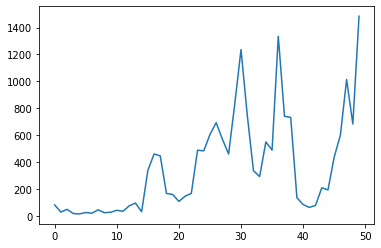

In [72]:
mu = 1 #drift
sigma = 0.08
dt=0.1
S0 = 100

def geometric_brownian_motion(mu, sigma, S0, dt, periods):
  """" Simples example """
  wiener=np.random.normal(0, np.sqrt(dt), periods) # generate random draws for each period of the Weiner process 
  exponentialterm=np.exp( (mu - sigma ** 2 / 2) * dt + sigma * wiener)
  St= S0 * exponentialterm.cumprod() #cumulative products to generate each period 
  plt.plot(St)

geometric_brownian_motion(mu, sigma, S0, dt, periods) 

In [74]:
def geometric_brownian_motion_simulations(mu, sigma, S0, dt, periods, simulations):
  
  # note that simulates a matrix random innovations sized simuations * periods   

  x = np.exp(
      (mu - sigma ** 2 / 2) * dt
      + sigma * np.random.normal(0, np.sqrt(dt), size=(simulations, periods)).T
  )

  
  x = np.vstack([np.ones(simulations), x])  # stacks a row of ones above so each one is then converted to the initial value 

  x = x0 * x.cumprod(axis=0)  # cumprod axis=0 operates over each row

  plt.plot(x)
  #plt.legend('simulations', simulations)
  plt.xlabel("$t$")
  plt.ylabel("$x$")
  plt.title(
      "Geometric Brownian Motion (10 simulations) with \n $\mu=1$ and $\sigma=0.8$"
  )
  plt.show()

In [83]:
sigma=0.8
x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(simulations, periods)).T)
x.size

500

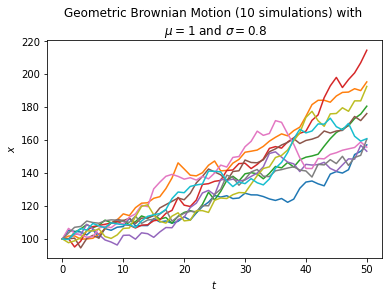

In [75]:
mu = 0.1
periods = 50
dt = 1/10
S0 = 100
np.random.seed(1)
sigma = 0.08
simulations=10

geometric_brownian_motion_simulations(mu, sigma, S0, dt, periods, simulations)

In [20]:
np.exp(np.random.normal(0, np.sqrt(dt), size=(10)))

array([7.56688317e+04, 2.11718062e+01, 1.07495995e+06, 1.34220374e-03,
       1.45494037e+13, 3.81175980e+03, 6.96314569e+02, 5.99365025e-01,
       7.05946437e-04, 1.70344658e-04])

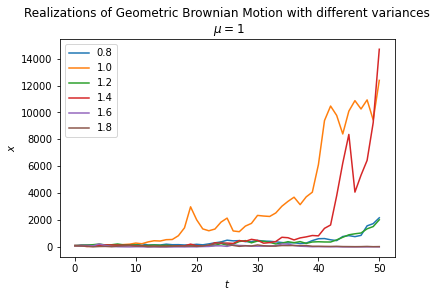

In [76]:
def geometric_brownian_motion_manysigmas(mu, sigma, S0, dt, periods):
  x = np.exp(
      (mu - sigma ** 2 / 2) * dt
      + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
  )
  x = np.vstack([np.ones(len(sigma)), x])
  x = x0 * x.cumprod(axis=0)

  plt.plot(x)
  plt.legend(np.round(sigma, 2))
  plt.xlabel("$t$")
  plt.ylabel("$x$")
  plt.title(
      "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
  )
  plt.show()


mu = 1
n = 50
dt = 0.1
x0 = 100
np.random.seed(1)
sigma = np.arange(0.8, 2, 0.2)

geometric_brownian_motion_manysigmas(mu, sigma, S0, dt, periods)